In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

firm_data = pd.read_csv("firm_data.csv")

In [9]:

#column names
print(firm_data.columns)


#initial view of the data
print(firm_data.head())


#print total NaN values per column

print(firm_data.isnull().sum())

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
   Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  \
0          3.89          23    4.18      0.6   2.508    2.50      0.2   0.500   
1          3.89           6    0.00      0.2   0.000    4.83      0.2   0.966   
2          3.89           6    0.51      0.2   0.102    0.23      0.2   0.046   
3          3.89           6    0.00      0.2   0.000   10.80      0.6   6.480   
4          3.89           6    0.00      0.2   0.000    0.08      0.2   0.016   

   TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  \
0   6.68      5.0  ...     0.4        0   0.2     0.0    

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk',
       'Audit_Risk', 'Risk'],
      dtype='object')


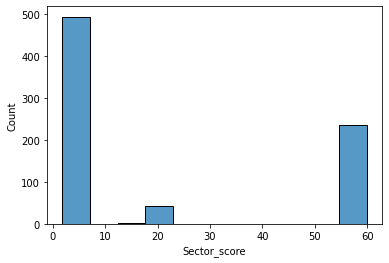

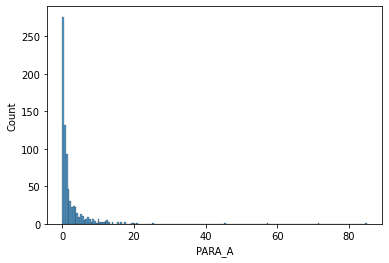

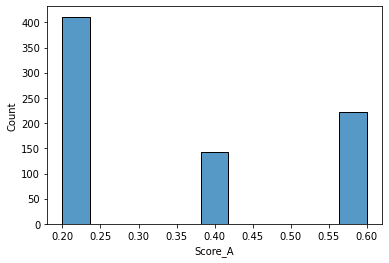

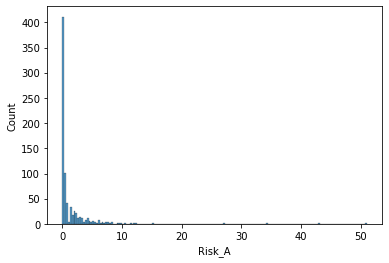

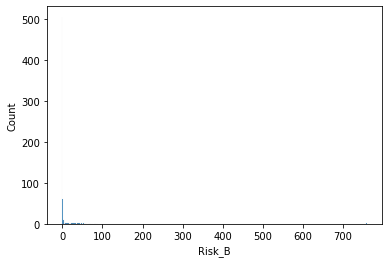

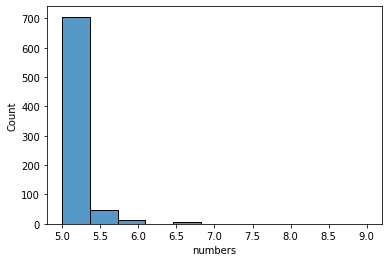

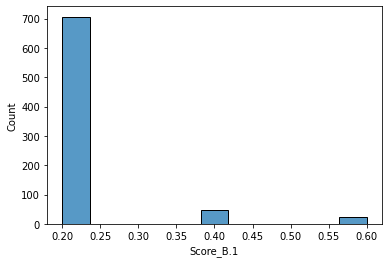

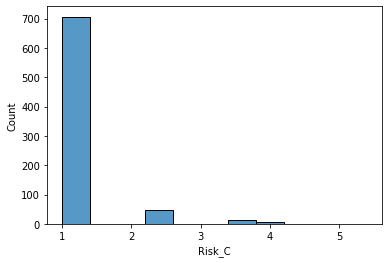

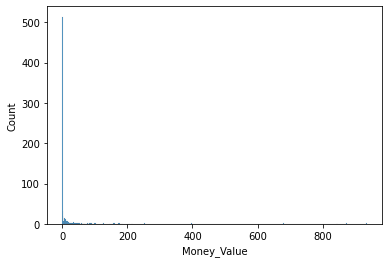

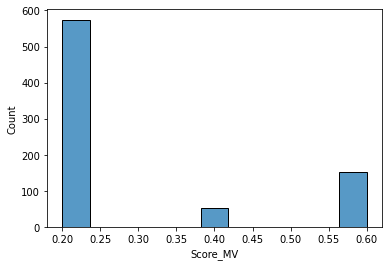

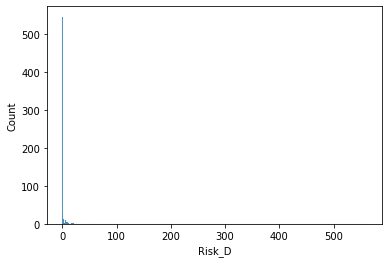

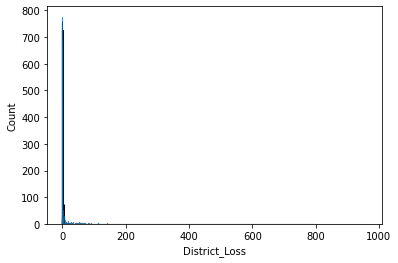

In [4]:


firm_data_v_two = firm_data.drop(["LOCATION_ID", "TOTAL"], axis = 1)

print(firm_data_v_two.columns)

firm_data_v_two["Money_Value"].fillna((firm_data_v_two['Money_Value'].mean()), inplace = True)

#Sector score 
sns.histplot(data = firm_data_v_two, x = "Sector_score")
plt.show()


#PARA_A histogram plot
sns.histplot(data = firm_data_v_two, x = "PARA_A")
plt.show()

#Score_A histogram plot
sns.histplot(data = firm_data_v_two, x = "Score_A")
plt.show()

#Risk_A histogram plot
sns.histplot(data = firm_data_v_two, x = "Risk_A")
plt.show()

#PARA_B histogram plot
sns.histplot(data = firm_data_v_two, x = "Risk_B")
plt.show()

#SCORE_B histogram plot
sns.histplot(data = firm_data_v_two, x = "numbers")
plt.show()

#Score B.1 histogram plot
sns.histplot(data = firm_data_v_two, x = "Score_B.1")
plt.show()

#Risk C histogram plot
sns.histplot(data = firm_data_v_two, x = "Risk_C")
plt.show()

#Money_Value histogram plot
sns.histplot(data = firm_data_v_two, x = "Money_Value")
plt.show()

#Score_MV histogram plot
sns.histplot(data = firm_data_v_two, x = "Score_MV")
plt.show()

#Risk_D histogram plot
sns.histplot(data = firm_data_v_two, x = "Risk_D")
plt.show()

#District_Loss histogram plot
sns.histplot(data = firm_data_v_two, x = "District_Loss")
plt.show()

#PROB histogram plot
sns.histplot(data = firm_data_v_two, x = "PROB")
plt.show()

#RiSk_E histogram plot
sns.histplot(data = firm_data_v_two, x = "RiSk_E")
plt.show()

#History histogram plot
sns.histplot(data = firm_data_v_two, x = "History")
plt.show()

#Prob histogram plot
sns.histplot(data = firm_data_v_two, x = "Prob")
plt.show()

#Risk_F histogram plot
sns.histplot(data = firm_data_v_two, x = "Risk_F")
plt.show()

#Score histogram plot
sns.histplot(data = firm_data_v_two, x = "Score")
plt.show()

#Inherent_Risk histogram plot
sns.histplot(data = firm_data_v_two, x = "Inherent_Risk")
plt.show()

#CONTROL_Risk histogram plot
sns.histplot(data = firm_data_v_two, x = "CONTROL_RISK")
plt.show()

#Detection_Risk histogram plot
sns.histplot(data = firm_data_v_two, x = "Detection_Risk")
plt.show()

#Audit_Risk histogram plot
sns.histplot(data = firm_data_v_two, x = "Audit_Risk")
plt.show()


#Risk histogram plot
sns.histplot(data = firm_data_v_two, x = "Risk")
plt.show()



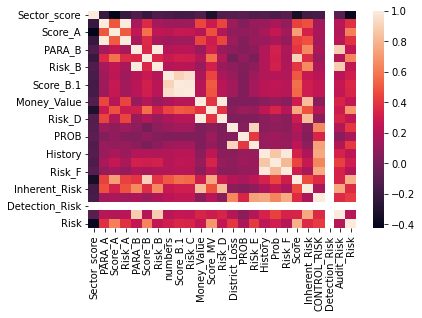

In [6]:


#heatmap
sns.heatmap(firm_data_v_two.corr())
plt.show()



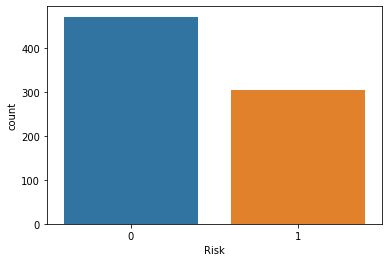

In [7]:
sns.countplot(data = firm_data_v_two, x = "Risk")
#plt.show()

In [11]:

print(firm_data_v_two.isnull().any())

X = firm_data_v_two.drop(["Risk"], axis = 1)
Y = firm_data_v_two.Risk

validation_size = .20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = f"{name}, {cv_results.mean()}, {cv_results.std()}"
  print(msg)                   


Sector_score      False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value       False
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR, -0.008064516129032258, 0.010819683762095756
LDA, -0.06129032258064515, 0.030432197200182597
KNN, -0.030645161290322576, 0.01339778042406141
CART, 0.0, 0.0
NB, -0.029032258064516127, 0.015803159630859213
SVM, -0.13548387096774195, 0.033985979847912066
